In [2]:
import pandas as pd
import numpy as np
string_data = pd.Series(["a","b",np.nan,"d"])
string_data.isnull() # .isnull() : 빈칸이 데이터가 없는 것이 데이터들이 많아지면 보기 어려우므로

0    False
1    False
2     True
3    False
dtype: bool

In [3]:
data = pd.Series([1,np.nan,3.5,np.nan,7])
data.dropna() # .dropna() : 빈칸을 그냥 뺴라 -> 센서네트워크에서 데이터를 얻어올 때 유용

0    1.0
2    3.5
4    7.0
dtype: float64

In [8]:
from numpy import nan as NA
data = pd.DataFrame([[1,6.5,3],[1,NA,NA],[NA,NA,NA],[NA,6.5,3]]) # 2차원일 때는 쉽지만 행열이 같이 이루어져있을 땐 어려움
cleaned_Data1 = data.dropna()
cleaned_Data1

cleaned_Data2 = data.dropna(how='all') # axis=0 : 한 행을 없애는 것 / axis=1 : 모든 칼럼에 N이 있을 떄 지워주자
cleaned_Data2

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
# thresh=2 : 칼럼 3개 중에 2개 이상의 NA가 있으면 없애라 (threshold:문턱값)
# 사람이 지정해 고정된 threshold값 사용, 인공지능이 조정하는 threshold값(최적값) 사용

In [ ]:
# 비워진 값을 채우기
df2 = df.fillna(0)
df2
df.fillna(0, inplace=True)
# _ = df.fillna(0, inplace=True) -> 원본의 NA가 0으로 채워짐 (보간메서드를 적용)

In [9]:
dic_data = {"k1":['one','two','one','two','one','two','two'],
            "k2":[1,1,2,3,3,4,4]}
data = pd.DataFrame(dic_data)
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [10]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [13]:
data.drop_duplicates() #중복된 것을 없애라

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [15]:
data['v1'] = [0,1,2,3,4,5,6]
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [16]:
data.drop_duplicates(['k1','k2'],keep='last') # keep='last' : 중복되는 것 중에 마지막 값을 사용

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


In [20]:
#bins 나누는 기준이 양자화와 영향
ages = [20,22,25,27,21,23,37,31,61,45,41,32]

In [21]:
bins = [18,25,35,60,100]

In [22]:
cats = pd.cut(ages, bins)
cats # Length: 12 -> 총 길이는 12이다. / "20은 18,25에 속한다"처럼 각 구간별로 나타남

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [23]:
pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [26]:
#정규표현식
import re
text = "foo bar\t baz \tqux"
print(text)

foo bar	 baz 	qux


In [27]:
re.split('\s+',text) #text를 분해

['foo', 'bar', 'baz', 'qux']

In [29]:
text = """Dave dave@google.com
Steve steve@google.com
Rob rob@google.com
Ryan ryan@google.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+.[A-Z]{2,4}' # 정규표현식의 패턴만들기
re1 = re.compile(pattern, flags=re.IGNORECASE)

In [30]:
re1.findall(text) #Steve,Rob,Ryan가 포함되지 않은 이유는 pattern에 부합하지 않아서!

['dave@google.com', 'steve@google.com', 'rob@google.com', 'ryan@google.com']

In [33]:
data = pd.Series(np.random.randn(9),
                index=['a','a','a,','b','b','c','c','d','d'])
data

a     0.510664
a     0.118838
a,   -0.160559
b    -1.408993
b     2.339346
c     0.401748
c     1.485996
d    -0.628674
d     0.170219
dtype: float64

In [35]:
data = pd.Series(np.random.randn(9),
                index=[['a','a','a','b','b','c','c','d','d'],
                [1,2,3,1,2,1,2,1,2]])
data

a  1    2.049454
   2   -0.608394
   3    0.521653
b  1   -0.197505
   2    1.956492
c  1   -0.447029
   2   -0.601475
d  1    0.449225
   2   -0.113413
dtype: float64

In [36]:
data['b']

1   -0.197505
2    1.956492
dtype: float64

In [37]:
data.loc[['b','d']]

b  1   -0.197505
   2    1.956492
d  1    0.449225
   2   -0.113413
dtype: float64

In [38]:
data.loc['b',2] #b와 2가 선택된 것이 아니라 b-2가 선택된것임

1.9564918383507033

In [44]:
df1 = pd.DataFrame({'key':['b','b','a','c','a','a','b'],'data1':[0,1,2,3,4,5,6]})
df2 = pd.DataFrame({'key':['a','b','d'],'data2':[0,1,2]})
pd.merge(df1,df2,on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [46]:
df3 = pd.DataFrame({'l_key':['b','b','a','c','a','a','b'],'data1':[0,1,2,3,4,5,6]})
df4 = pd.DataFrame({'r_key':['a','b','d'],'data2':[0,1,2]})
pd.merge(df3,df4,right_on="r_key",left_on="l_key")

,l_key,data1,r_key,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [48]:
arr = np.arange(12).reshape((3,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [50]:
np.concatenate([arr,arr]) # 어떤 걸 합병할 것인지

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [51]:
np.concatenate([arr,arr], axis=1) # axis=1 -> 열방향으로 축이 바뀜

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [53]:
s1 = pd.Series([0,1],index=["a","b"])
s2 = pd.Series([2,3,4],index=["c","d","e"])
s3 = pd.Series([5,6],index=["f","g"])
print(s1)
print(s2)
print(s3)

a    0
b    1
dtype: int64
c    2
d    3
e    4
dtype: int64
f    5
g    6
dtype: int64


In [56]:
# s1,s2,s3을 concat했을 떄
pd.concat([s1,s2,s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [59]:
df1 = pd.DataFrame(np.random.randn(3,4), columns=['a','b','c','d'])
df2 = pd.DataFrame(np.random.randn(2,3), columns=['b','d','a'])
pd.concat([df1,df2])

,a,b,c,d
0,0.745852,-0.535588,1.379320,0.680948
1,0.367853,1.174351,0.409686,0.087177
2,-0.285112,1.316265,-1.991885,0.139675
0,-0.291429,-1.100076,NaN,0.602222
1,1.206701,0.388246,NaN,0.811086


In [60]:
pd.concat([df1,df2],ignore_index=True) # index number가 기존의 인덱스를 무시하도록 명령함 

,a,b,c,d
0,0.745852,-0.535588,1.379320,0.680948
1,0.367853,1.174351,0.409686,0.087177
2,-0.285112,1.316265,-1.991885,0.139675
3,-0.291429,-1.100076,NaN,0.602222
4,1.206701,0.388246,NaN,0.811086


In [61]:
rng = pd.date_range('2000-01-01',periods=12,freq="T")
rng

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00', '2000-01-01 00:05:00',
               '2000-01-01 00:06:00', '2000-01-01 00:07:00',
               '2000-01-01 00:08:00', '2000-01-01 00:09:00',
               '2000-01-01 00:10:00', '2000-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')

In [62]:
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [63]:
ts.resample('5min',closed='right').sum() #sum방식으로 5분단위로 묶어냄

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [65]:
ts.resample('5min',closed='right').mean()

1999-12-31 23:55:00     0
2000-01-01 00:00:00     3
2000-01-01 00:05:00     8
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [70]:
frame = pd.DataFrame(np.random.randn(2,4), index=pd.date_range("1/1/2000",periods=2,freq='W-WED'),
                    columns=["a","b","c","d"])
frame

,a,b,c,d
2000-01-05,-0.410101,0.254061,0.979439,1.578537
2000-01-12,0.907805,0.324768,1.183911,0.948672


In [71]:
df_daily = frame.resample('D').asfreq()
df_daily

,a,b,c,d
2000-01-05,-0.410101,0.254061,0.979439,1.578537
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.907805,0.324768,1.183911,0.948672


In [73]:
df_daily.interpolate(method='values') #interpolate : 빠져있는 데이터에 시간의 변화율에 따라 채워넣는다(데이터전처리방법)

,a,b,c,d
2000-01-05,-0.410101,0.254061,0.979439,1.578537
2000-01-06,-0.221829,0.264162,1.008649,1.488556
2000-01-07,-0.033557,0.274263,1.037860,1.398575
2000-01-08,0.154716,0.284364,1.067070,1.308595
2000-01-09,0.342988,0.294465,1.096280,1.218614
2000-01-10,0.531260,0.304566,1.125491,1.128633
2000-01-11,0.719532,0.314667,1.154701,1.038653
2000-01-12,0.907805,0.324768,1.183911,0.948672


In [80]:
close_px_all = pd.read_csv('주피터노트북파일/examples/stock_px_2.csv',parse_dates=True,index_col=0)
close_px = close_px_all[["AAPL","MSFT","XOM"]]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<AxesSubplot:>

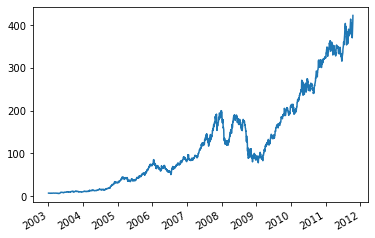

In [81]:
close_px.AAPL.plot()

<AxesSubplot:>

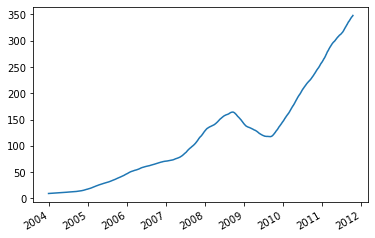

In [82]:
close_px.AAPL.rolling(250).mean().plot()

In [84]:
path = "주피터노트북파일/datasets/bitly_usagov/example.txt"
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [87]:
import json
path = "주피터노트북파일/datasets/bitly_usagov/example.txt"
records = [json.loads(line)for line in open(path, 'rt',encoding="UTF-8")]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [90]:
time_zones = [rec['tz']for rec in records if 'tz' in rec] #관심있는 특정한 value를 이렇게 명령해 적는다/
time_zones[:10] #샘플확인필수!

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [93]:
def get_counts(seq):
    counts={}
    for x in seq:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts #갯수를 세는게 의미가 있는지, 총합을 세는게 의미가 있는지 고민

In [94]:
counts = get_counts(time_zones)
counts["America/New_York"]

1251

In [95]:
len(time_zones)

3440

In [97]:
frame = pd.DataFrame(records)
frame.info() #가지고 온 데이터가 information 잘 됐나 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [98]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [100]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [102]:
clean_tz = frame['tz'].fillna("Missing") #빈칸이 있으면 missing으로 처리해라
clean_tz[clean_tz ==""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [103]:
import seaborn as sns 

<AxesSubplot:>

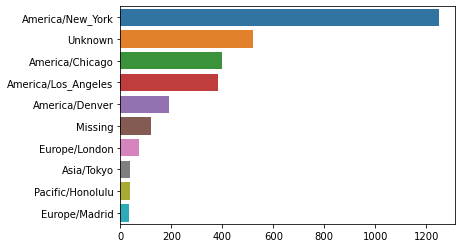

In [104]:
subset = tz_counts[:10] #10개만 subset으로 만들어줘라
sns.barplot(y=subset.index, x=subset.values)